In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_pickle('../../../data/trimmed_processed/WELFake.pkl')

x = df['text']
y = df['label']

In [4]:
x_train,x_test,y_train,y_test = train_test_split(
    x,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    max_df=0.8,
    stop_words='english'
)

x_train_tfidf = tfidf.fit_transform(x_train)
x_test_idf = tfidf.transform(x_test)



In [5]:
clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(x_train_tfidf,y_train)

y_pred = clf.predict(x_test_idf)

              precision    recall  f1-score   support

        FAKE     0.9401    0.9402    0.9401      7006
        REAL     0.9435    0.9434    0.9435      7421

    accuracy                         0.9418     14427
   macro avg     0.9418    0.9418    0.9418     14427
weighted avg     0.9418    0.9418    0.9418     14427



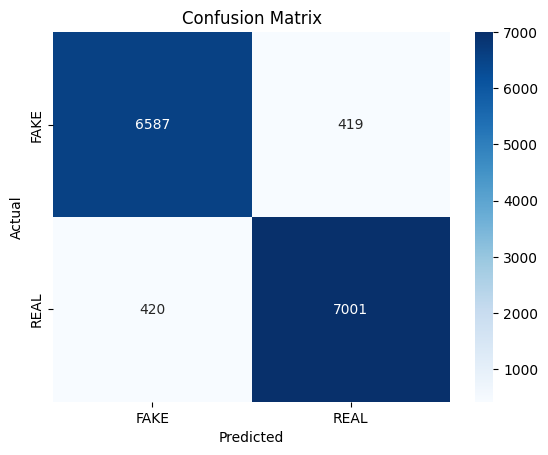

In [6]:
print(classification_report(y_test,y_pred, digits=4))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=clf.classes_,yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [9]:
user_in = input()

clf.predict(tfidf.transform([user_in]))

array(['REAL'], dtype=object)